In [1]:
exec(open("init_notebook.py", "r").read())
%load_ext autoreload

SCALE_FACTOR = 1

current working dirC:\Users\abjawad\Documents\GitHub\cogmod-driver-behavior-model


In [17]:
from enum import Enum
import os
import glob
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from analysis.Histogram import Histogram
from research.ResearchCarFollow import ScenarioState

from highd_tools.highD import DataHandler
from highd_tools.highD.ManeuverFilter import FollowType


In [25]:
file_path = "logs\\2023-05-03-21-12-21.csv"
# C:\Users\abjawad\Documents\GitHub\cogmod-human-driver-model\logs\2023-02-08-22-59-59_0.csv
df = pd.read_csv(file_path)
print(df.columns)
print(df.shape)
scenario_set = df["scenario_id"].unique()
print(scenario_set)

Index(['scenario_id', 'frame', 'scenario_status', 'ego_id', 'c_x', 'c_y',
       'c_speed', 'c_steer', 'c_throttle', 'c_brake', 'perceived_c_x',
       'perceived_c_y', 'perceived_c_speed', 'gaze_direction', 'preceding_id',
       'a_x', 'a_y', 'a_speed'],
      dtype='object')
(8709, 18)
[0 1 2 3 4 5 6 7 8]


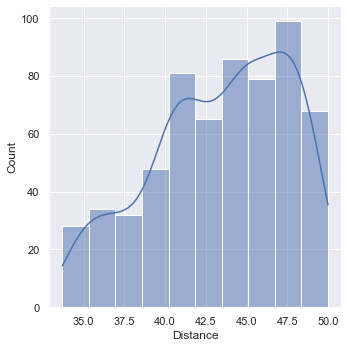

In [26]:
scenario_ids = set(df['scenario_id'])
df = df.copy(deep=True)
lane_follow_frames = df[df['scenario_status'] != "ScenarioState.PENDING"]

c_x = df['c_x']
c_y = df['c_y']

p_x = df['a_x']
p_y = df['a_y']

lane_follow_frames['distance'] = np.sqrt((c_x - p_x)**2 + (c_y - p_y)**2)
lane_follow_frames['relative_speed'] = df['c_speed'] - df['a_speed']

lane_follow_frames = lane_follow_frames[lane_follow_frames['distance'] < 50]
Histogram.plotMetricsDF(lane_follow_frames, 'distance', 'Distance', 10, True)


3157
Index(['scenario_id', 'frame', 'scenario_status', 'ego_id', 'c_x', 'c_y',
       'c_speed', 'c_steer', 'c_throttle', 'c_brake', 'perceived_c_x',
       'perceived_c_y', 'perceived_c_speed', 'gaze_direction', 'preceding_id',
       'a_x', 'a_y', 'a_speed', 'distance', 'relative_speed'],
      dtype='object')


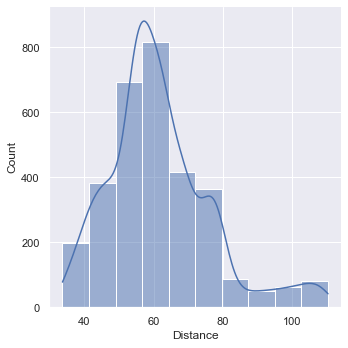

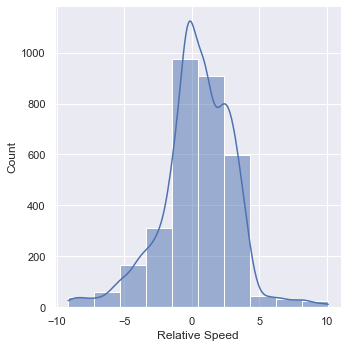

In [29]:
scenario_ids = set(df['scenario_id'])
df = df.copy(deep=True)
lane_follow_frames = df[df['scenario_status'] != "ScenarioState.PENDING"]
frame_count = 0

c_x = df['c_x']
c_y = df['c_y']

p_x = df['a_x']
p_y = df['a_y']

print(len(lane_follow_frames))
lane_follow_frames['distance'] = np.sqrt((c_x - p_x)**2 + (c_y - p_y)**2)
lane_follow_frames['relative_speed'] = df['c_speed'] - df['a_speed']
print(lane_follow_frames.columns)

Histogram.plotMetricsDF(lane_follow_frames, 'distance', 'Distance', 10, True)
Histogram.plotMetricsDF(lane_follow_frames, 'relative_speed', 'Relative Speed', 10, True)

In [10]:
df.columns

Index(['scenario_id', 'frame', 'scenario_status', 'ego_id', 'c_x', 'c_y',
       'c_speed', 'c_steer', 'c_throttle', 'c_brake', 'perceived_c_x',
       'perceived_c_y', 'perceived_c_speed', 'gaze_direction', 'preceding_id',
       'a_x', 'a_y', 'a_speed'],
      dtype='object')

{250} {248} len  328
{267} {265} len  339
{379} {377} len  341
{424} {417} len  379


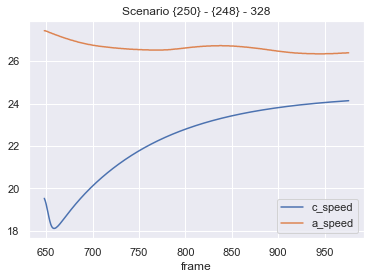

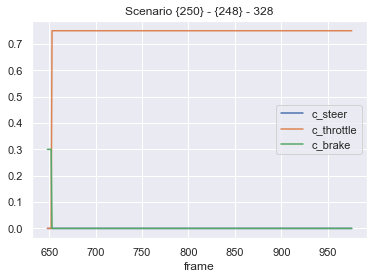

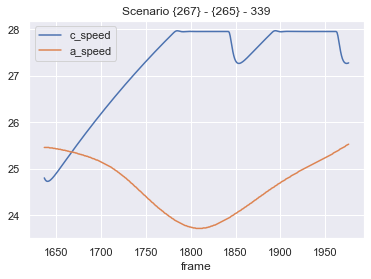

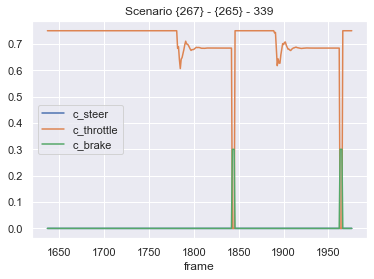

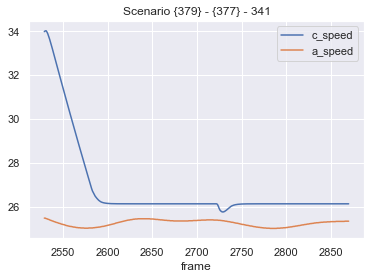

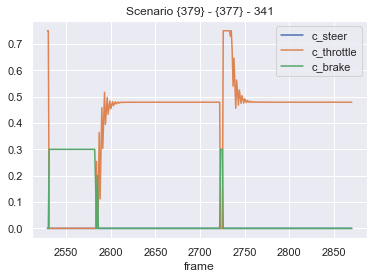

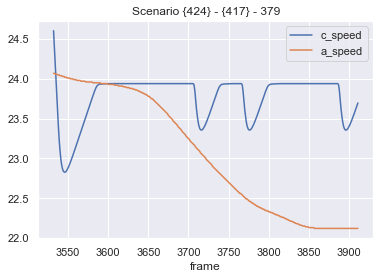

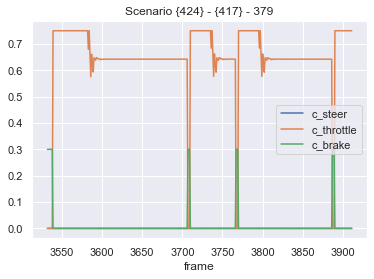

In [9]:
def draw_scenario(df, i):
    scenario_id = i
    new_df = df.copy(deep=True)
    new_df = new_df[new_df["scenario_id"] == scenario_id]
    new_df = new_df[new_df["scenario_status"] != "ScenarioState.PENDING"]

    new_df["c_speed"] = new_df["c_speed"] / SCALE_FACTOR
    new_df['distance'] = np.sqrt((new_df['c_x'] - new_df['a_x'])**2 + (new_df['c_y'] - new_df['a_y'])**2)
    new_df["relative_speed"] = new_df["c_speed"] - new_df["a_speed"]

    ego_id = set(new_df['ego_id'].values)
    preceding_id = set(new_df['preceding_id'].values)
    length = new_df['frame'].values[-1] - new_df['frame'].values[0]
    print(ego_id, preceding_id, 'len ', length)

    title = f"Scenario {ego_id} - {preceding_id} - {length}"
    new_df.plot(x="frame", y=["c_speed", "a_speed"], title=title)
    # new_df.plot(x="frame", y=["relative_speed"], title=title)
    # new_df.plot(x="frame", y=["distance"], title=title)

    new_df.plot(x="frame", y=["c_steer", "c_throttle", "c_brake"], title=title)

    

for i in range(0, 4):
    draw_scenario(df, i)